In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [4]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [5]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

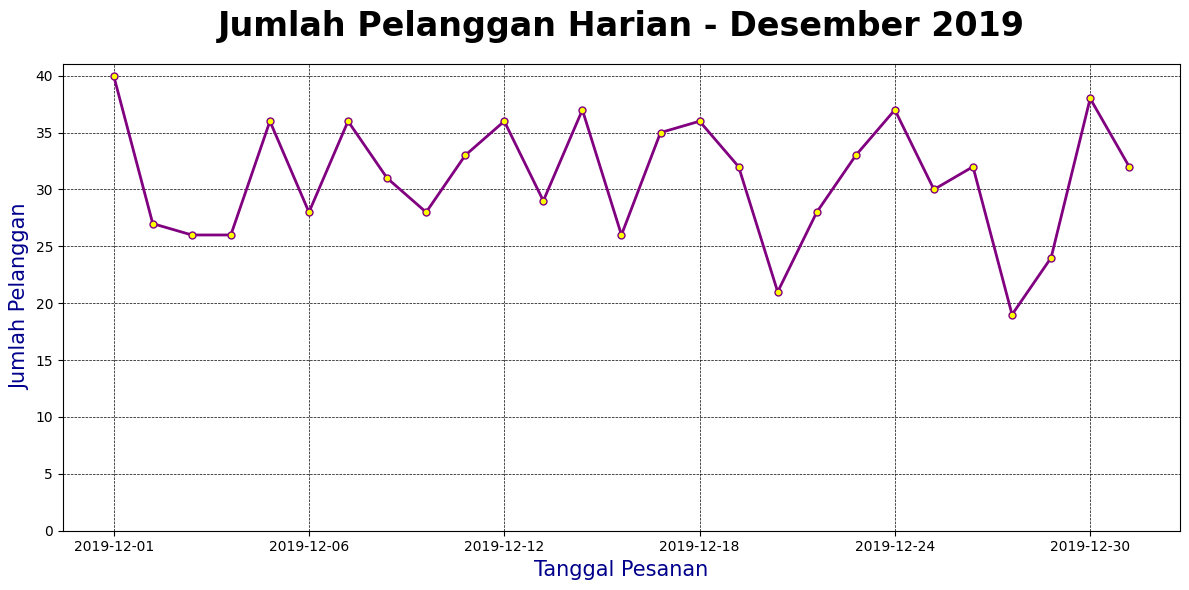

In [6]:
plt.figure(figsize=(12, 6))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='purple', marker='.',markersize=10, linewidth=2, markerfacecolor='yellow')
plt.title('Jumlah Pelanggan Harian - Desember 2019', loc='center', pad=20,weight='bold', fontsize=24, color='k')
plt.xlabel('Tanggal Pesanan', fontsize=15, color='darkblue')
plt.ylabel('Jumlah Pelanggan', fontsize=15, color='darkblue')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

1. **Menampilkan 5 Brand Penjualan Teratas**

In [7]:
# Menghitung total kuantitas penjualan untuk setiap merek
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
# Membuat subset dataset yang hanya berisi data dari 5 merek teratas pada bulan Desember 2019
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
# Menampilkan hasil top_brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


2. **Menampilkan Multi-Line Chart Kuantitas Penjualan **

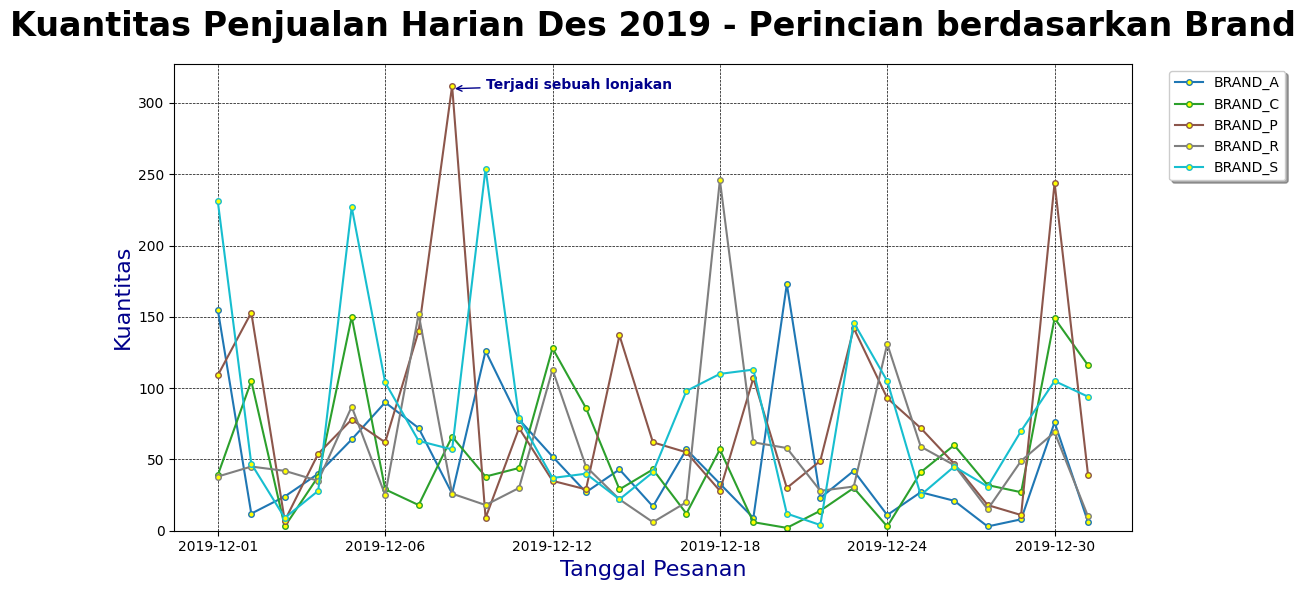

In [8]:
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.',markersize=8 ,markerfacecolor='yellow', cmap='tab10')
plt.title('Kuantitas Penjualan Harian Des 2019 - Perincian berdasarkan Brand',loc='center',pad=20,weight='bold', fontsize=24, color='k')
plt.xlabel('Tanggal Pesanan',loc='center', fontsize=16, color='darkblue')
plt.ylabel('Kuantitas',loc='center', fontsize=16, color='darkblue')
plt.grid(color='black', linestyle='--', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi sebuah lonjakan', xy=(7, 310), xytext=(8, 310),
             weight='bold', color='darkblue',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='darkblue'))

plt.gcf().set_size_inches(12, 6)
plt.tight_layout()

3. **Menampilkan Jumlah Produk yang laku pada tiap Brand selama bulan Desember**

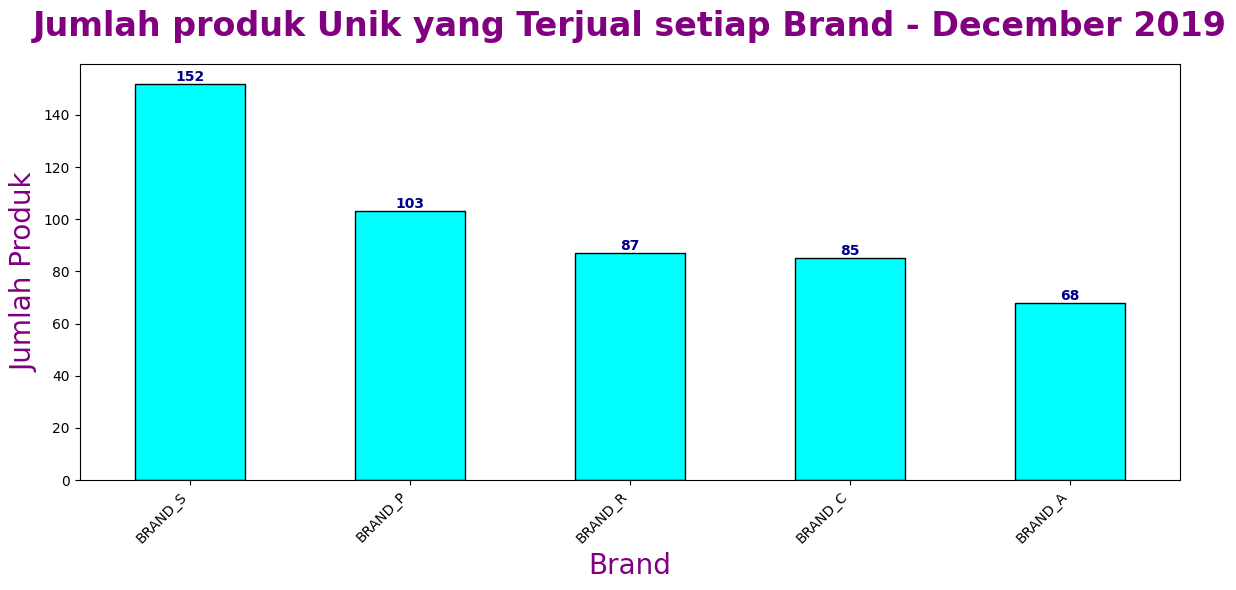

In [9]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='cyan',edgecolor='black')
plt.title('Jumlah produk Unik yang Terjual setiap Brand - December 2019', loc='center', pad=20,weight='bold', fontsize=24, color='purple')
plt.xlabel('Brand', fontsize=20, color='purple')
plt.ylabel('Jumlah Produk', fontsize=20, color='purple')
plt.ylim(ymin=0)
plt.xticks(rotation=45, ha='right')
# Menambahkan nilai di atas setiap batang grafik
brand_counts = dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
for i, count in enumerate(brand_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', color='darkblue', fontweight='bold')

plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show()

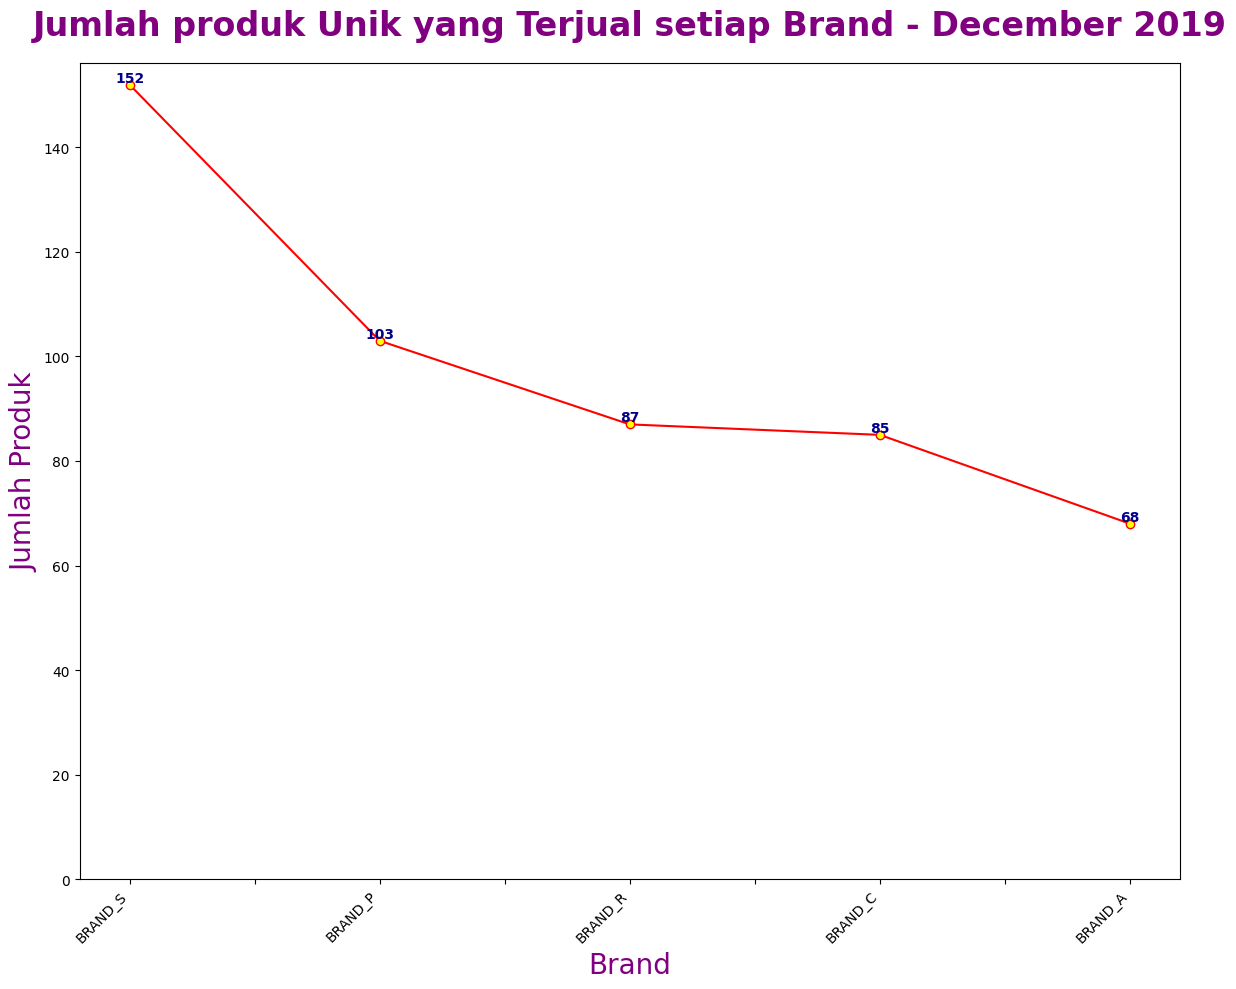

In [10]:
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(marker='o',markerfacecolor='yellow', linestyle='-', color='r')
plt.title('Jumlah produk Unik yang Terjual setiap Brand - December 2019', loc='center', pad=20,weight='bold', fontsize=24, color='purple')
plt.xlabel('Brand', fontsize=20, color='purple')
plt.ylabel('Jumlah Produk', fontsize=20, color='purple')
plt.ylim(ymin=0)
plt.xticks(rotation=45, ha='right')
# Menambahkan nilai di atas setiap titik grafik
brand_counts = dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
for i, count in enumerate(brand_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', color='darkblue', fontweight='bold')
plt.gcf().set_size_inches(12, 10)
plt.tight_layout()
plt.show()

4. Penjualan Produk dengan Jumlah Lebih dari 100 dan Produk dengan Jumlah kurang dari 100 pada Bulan Desember 2019 dengan menggunakan Stacked Chart

In [11]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

In [12]:
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

In [13]:
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

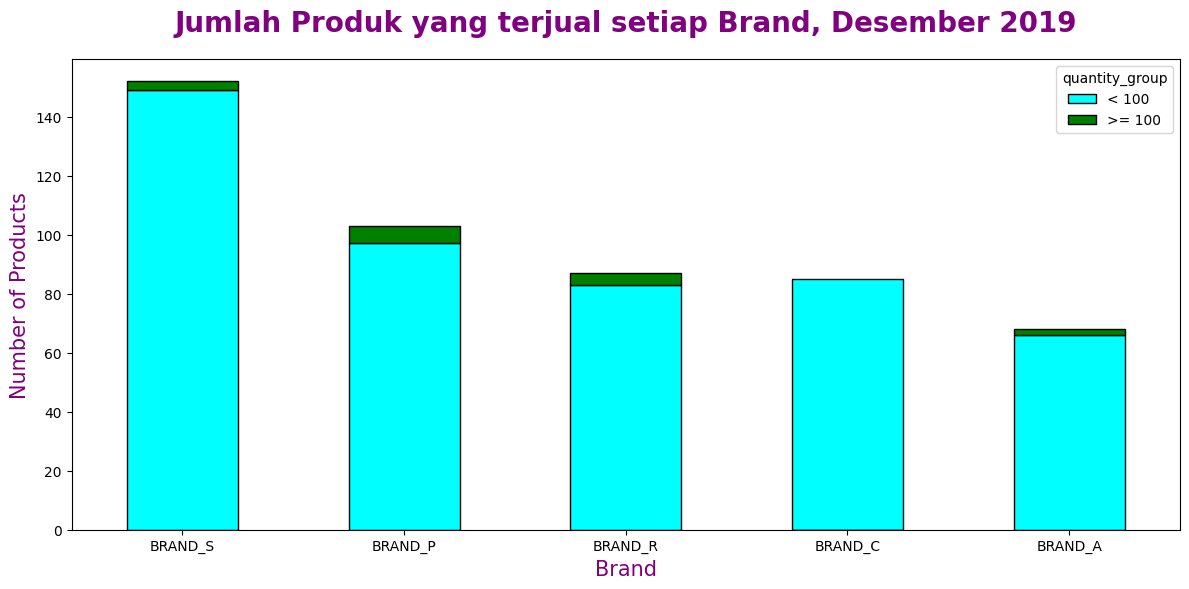

In [41]:
dataset_top5brand_dec_per_product.groupby(['brand', 'quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True, color=['cyan', 'green'], edgecolor='black')
plt.title('Jumlah Produk yang terjual setiap Brand, Desember 2019', loc='center', pad=20, fontsize=20,weight='bold', color='purple')
plt.xlabel('Brand', color='purple', fontsize=15)
plt.ylabel('Number of Products', color='purple', fontsize=15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show()

5. **Menampilkan Distribusi Harga berbagai Produk pada top 5 Brand menggunakan grafik Histogram**

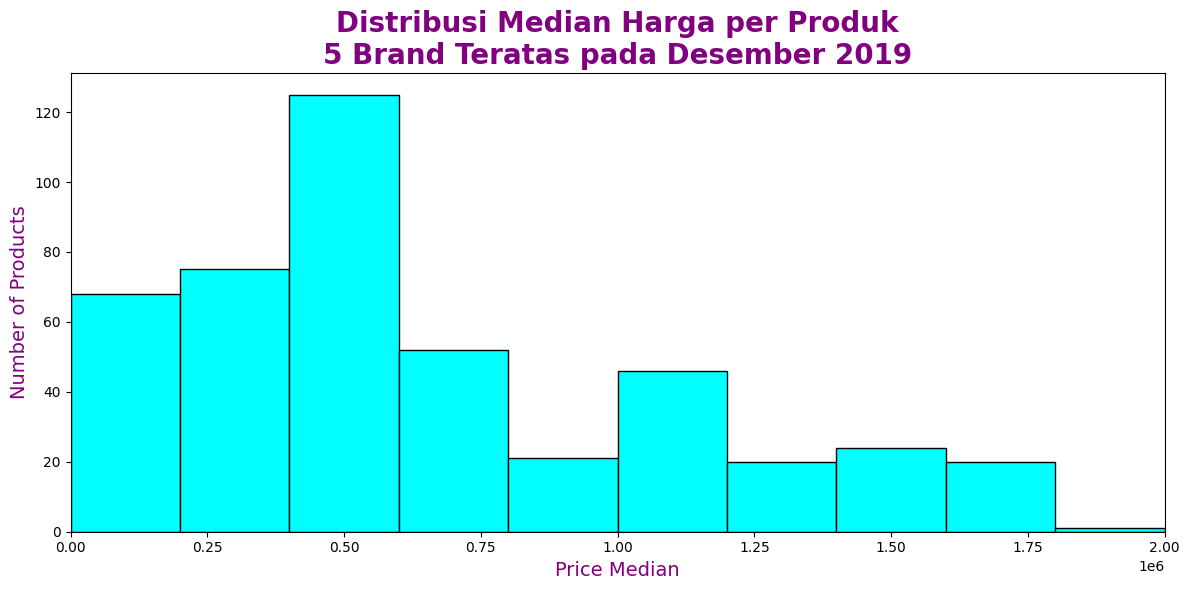

In [40]:
plt.figure(figsize=(10, 5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1, 2000000), color='cyan', edgecolor='black')
plt.title('Distribusi Median Harga per Produk\n5 Brand Teratas pada Desember 2019', fontsize=20,weight='bold', color='purple')
plt.xlabel('Price Median', color='purple', fontsize=14)
plt.ylabel('Number of Products', color='purple', fontsize=14)
plt.xlim(xmin=0, xmax=2000000)
plt.gcf().set_size_inches(12, 6)
plt.tight_layout()
plt.show()

**6.A. Korelasi (Hubungan) antara Kuantitas (Jumlah/Banyaknya Barang) vs GMV**

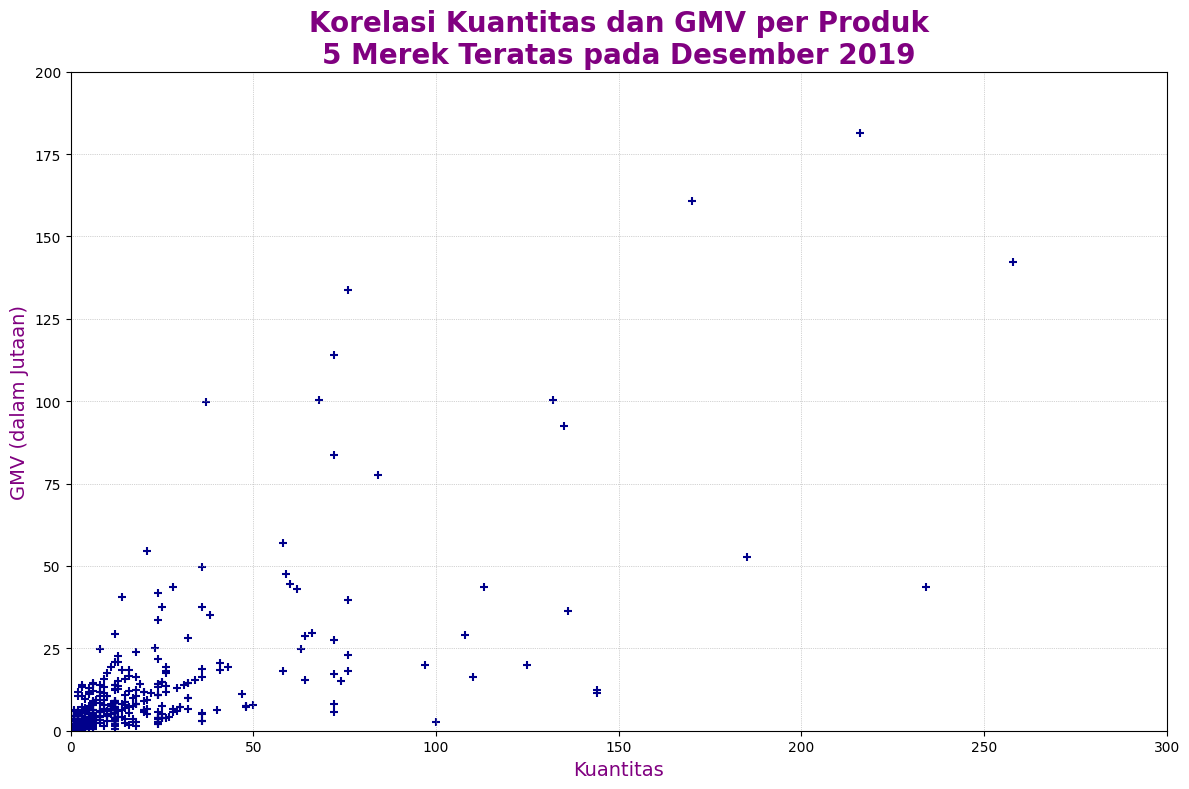

In [39]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(12, 8))
plt.scatter(data_per_product_top5brand_dec['quantity'], data_per_product_top5brand_dec['gmv'], marker='+', color='darkblue')
plt.title('Korelasi Kuantitas dan GMV per Produk\n5 Merek Teratas pada Desember 2019', fontsize=20,weight='bold', color='purple')
plt.xlabel('Kuantitas', color='purple', fontsize=14)
plt.ylabel('GMV (dalam Jutaan)', color='purple', fontsize=14)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, ['{:,.0f}'.format(label/1000000) for label in labels])
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

plt.gcf().set_size_inches(12, 8)
plt.tight_layout()
plt.show()

6.B.**Korelasi antara median harga vs Kuantitas/Jumlah barang**

<Figure size 640x480 with 0 Axes>

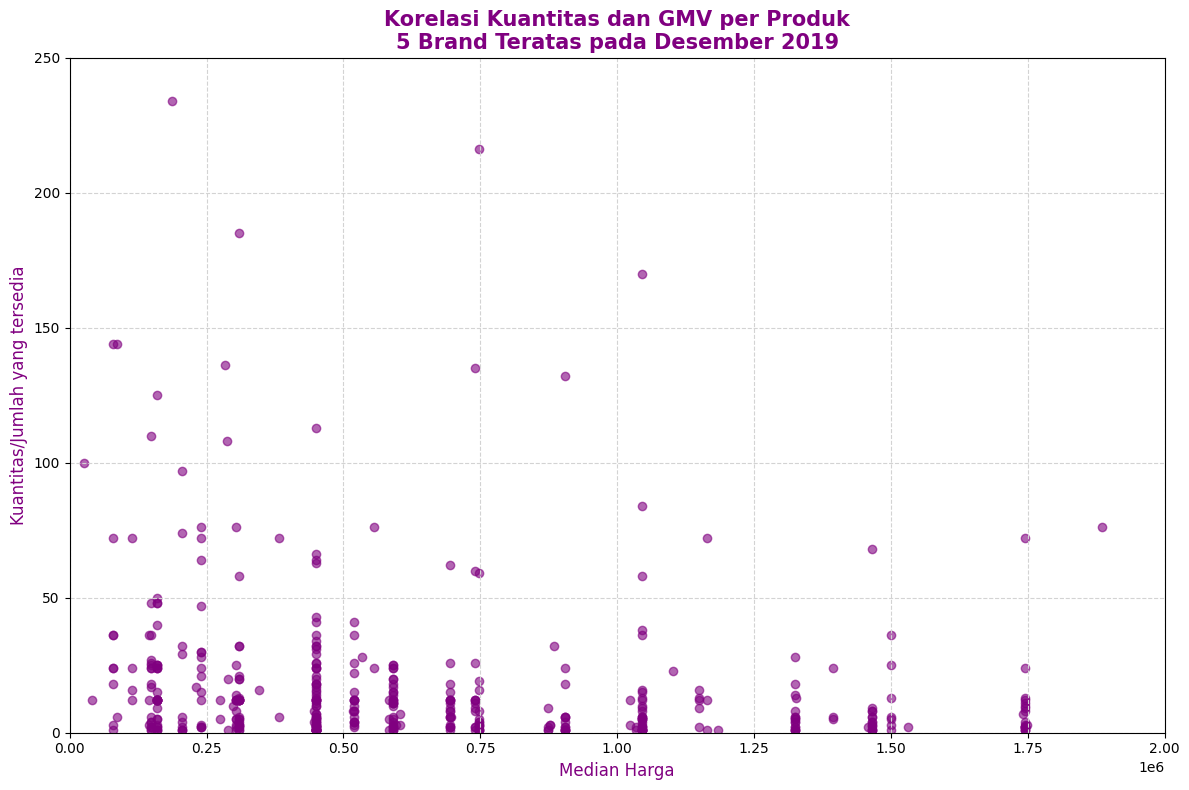

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(12, 8))
color = 'purple'
alpha = 0.6

plt.scatter(data_per_product_top5brand_dec['item_price'], data_per_product_top5brand_dec['quantity'], marker='o', color=color, alpha=alpha)
plt.title('Korelasi Kuantitas dan GMV per Produk\n5 Brand Teratas pada Desember 2019', fontsize=15, weight='bold', color=color)
plt.xlabel('Median Harga', fontsize=12, color=color)
plt.ylabel('Kuantitas/Jumlah yang tersedia', fontsize=12, color=color)
plt.xlim(xmin=0, xmax=2000000)
plt.ylim(ymin=0, ymax=250)
plt.grid(color='lightgray', linestyle='--')
plt.tight_layout()
plt.show()